In [1]:
import numpy as np
from scipy.signal import correlate
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
df_timeseries_green_clusters_s1 = pd.read_csv("data/DatasetClusters/fishes/fish02/s1/df_timeseries_green_clusters_s1.csv")
df_timeseries_red_clusters_s1 = pd.read_csv("data/DatasetClusters/fishes/fish02/s1/df_timeseries_red_clusters_s1.csv")

In [3]:
def rename_column_green(col_name):
    if col_name[-2:].isdigit():
        new_name = "cluster_" + col_name[-2:] + "_green_s1"
    else:
        new_name = "cluster_" + col_name[-1] + "_green_s1"
    return new_name

df_timeseries_green_clusters_s1.columns = [rename_column_green(col) for col in df_timeseries_green_clusters_s1.columns]

df_timeseries_green_clusters_s1.head()

,cluster_1_green_s1,cluster_2_green_s1,cluster_3_green_s1,cluster_4_green_s1,cluster_5_green_s1,cluster_6_green_s1,cluster_7_green_s1,cluster_8_green_s1,cluster_9_green_s1,cluster_10_green_s1,cluster_11_green_s1,cluster_12_green_s1
0,0.030856,0.054824,-0.211879,-0.351072,-1.096113,-0.009276,-0.306236,-0.200512,-0.142584,-0.584659,0.033635,-0.458148
1,-0.013391,0.069814,-0.041926,0.087172,0.492667,0.182319,-0.133862,-0.257375,-0.144698,-0.214398,-0.141972,0.312722
2,0.055926,0.025640,-0.064736,0.083968,0.627666,0.487516,-0.288569,-0.366709,-0.186428,-0.297199,-0.027306,0.458864
3,-0.027593,0.141087,-0.055654,-0.012380,-0.064248,0.409693,-0.194898,-0.213119,-0.043130,-0.479734,-0.065615,0.219792
4,0.002930,0.113149,-0.013598,0.061259,-0.321807,0.243438,-0.428746,-0.119532,0.000658,-0.566226,0.094333,0.078933


In [4]:
def rename_column_green(col_name):
    if col_name[-2:].isdigit():
        new_name = "cluster_" + col_name[-2:] + "_red_s1"
    else:
        new_name = "cluster_" + col_name[-1] + "_red_s1"
    return new_name

df_timeseries_red_clusters_s1.columns = [rename_column_green(col) for col in df_timeseries_red_clusters_s1.columns]

df_timeseries_red_clusters_s1.head()

,cluster_1_red_s1,cluster_2_red_s1,cluster_3_red_s1,cluster_4_red_s1,cluster_5_red_s1,cluster_6_red_s1,cluster_7_red_s1,cluster_8_red_s1
0,-0.465304,-0.039182,-0.145111,-0.820533,-0.043201,0.065635,-0.133898,-1.221447
1,-0.360442,0.565558,-0.029222,-0.730112,0.269952,0.325601,-0.065495,-0.490533
2,-0.204723,0.364503,0.119252,-0.529757,-0.244755,0.430598,0.164129,-0.567888
3,0.062240,0.274655,-0.139845,-0.408598,-0.201634,0.225573,-0.259828,-0.356369
4,-0.331344,0.372020,0.076066,-0.736249,-0.149454,0.482838,-0.297057,-0.240255


In [5]:
df_timeseries_red_clusters_s1 = pd.DataFrame(df_timeseries_red_clusters_s1['cluster_1_red_s1'])


In [6]:
import itertools
red_columns = df_timeseries_red_clusters_s1.columns
green_columns = df_timeseries_green_clusters_s1.columns

# Generate all possible pairs of red and green columns
all_pairs = list(itertools.product(red_columns, green_columns))



In [7]:
all_pairs

[('cluster_1_red_s1', 'cluster_1_green_s1'),
 ('cluster_1_red_s1', 'cluster_2_green_s1'),
 ('cluster_1_red_s1', 'cluster_3_green_s1'),
 ('cluster_1_red_s1', 'cluster_4_green_s1'),
 ('cluster_1_red_s1', 'cluster_5_green_s1'),
 ('cluster_1_red_s1', 'cluster_6_green_s1'),
 ('cluster_1_red_s1', 'cluster_7_green_s1'),
 ('cluster_1_red_s1', 'cluster_8_green_s1'),
 ('cluster_1_red_s1', 'cluster_9_green_s1'),
 ('cluster_1_red_s1', 'cluster_10_green_s1'),
 ('cluster_1_red_s1', 'cluster_11_green_s1'),
 ('cluster_1_red_s1', 'cluster_12_green_s1')]

In [8]:
pairs_dic = {}
for i in range(len(all_pairs)):
    pairs_dic[i] = all_pairs[i]

In [9]:
paired_df = pd.DataFrame()

for red_col, green_col in all_pairs:
    # Assuming each pair of columns should be concatenated side by side
    paired_data = pd.concat([df_timeseries_red_clusters_s1[red_col], df_timeseries_green_clusters_s1[green_col]], axis=1)
    
    # Optionally rename columns to reflect they are paired data
    paired_data.columns = [f'{red_col}_paired', f'{green_col}_paired']
    
    # Append the paired data to the initialized DataFrame
    paired_df = pd.concat([paired_df, paired_data], axis=1)

In [10]:
paired_data_pred = paired_df
#paired_data_pred.to_csv("data/DatasetClusters/fishes/fish02/pred_data/pred_f2.csv",index=False)

<Axes: >

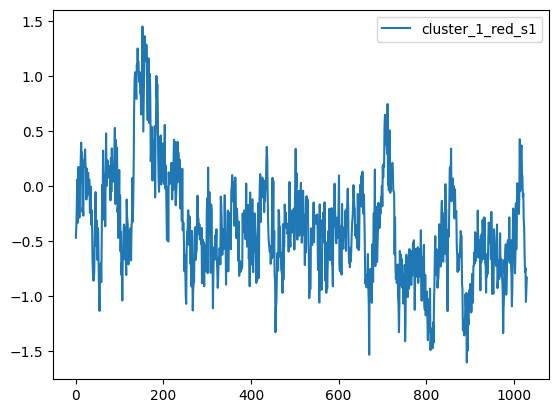

In [11]:
df_timeseries_red_clusters_s1.plot()

In [129]:
paired_data_pred

,cluster_1_red_s1_paired,cluster_1_green_s1_paired,cluster_1_red_s1_paired,cluster_2_green_s1_paired,cluster_1_red_s1_paired,cluster_3_green_s1_paired,cluster_1_red_s1_paired,cluster_4_green_s1_paired,cluster_1_red_s1_paired,cluster_5_green_s1_paired,cluster_1_red_s1_paired,cluster_6_green_s1_paired,cluster_1_red_s1_paired,cluster_7_green_s1_paired,cluster_1_red_s1_paired,cluster_8_green_s1_paired,cluster_1_red_s1_paired,cluster_9_green_s1_paired,cluster_1_red_s1_paired,cluster_10_green_s1_paired,cluster_1_red_s1_paired,cluster_11_green_s1_paired,cluster_1_red_s1_paired,cluster_12_green_s1_paired
0,-0.465304,0.030856,-0.465304,0.054824,-0.465304,-0.211879,-0.465304,-0.351072,-0.465304,-1.096113,-0.465304,-0.009276,-0.465304,-0.306236,-0.465304,-0.200512,-0.465304,-0.142584,-0.465304,-0.584659,-0.465304,0.033635,-0.465304,-0.458148
1,-0.360442,-0.013391,-0.360442,0.069814,-0.360442,-0.041926,-0.360442,0.087172,-0.360442,0.492667,-0.360442,0.182319,-0.360442,-0.133862,-0.360442,-0.257375,-0.360442,-0.144698,-0.360442,-0.214398,-0.360442,-0.141972,-0.360442,0.312722
2,-0.204723,0.055926,-0.204723,0.025640,-0.204723,-0.064736,-0.204723,0.083968,-0.204723,0.627666,-0.204723,0.487516,-0.204723,-0.288569,-0.204723,-0.366709,-0.204723,-0.186428,-0.204723,-0.297199,-0.204723,-0.027306,-0.204723,0.458864
3,0.062240,-0.027593,0.062240,0.141087,0.062240,-0.055654,0.062240,-0.012380,0.062240,-0.064248,0.062240,0.409693,0.062240,-0.194898,0.062240,-0.213119,0.062240,-0.043130,0.062240,-0.479734,0.062240,-0.065615,0.062240,0.219792
4,-0.331344,0.002930,-0.331344,0.113149,-0.331344,-0.013598,-0.331344,0.061259,-0.331344,-0.321807,-0.331344,0.243438,-0.331344,-0.428746,-0.331344,-0.119532,-0.331344,0.000658,-0.331344,-0.566226,-0.331344,0.094333,-0.331344,0.078933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.776604,0.145693,-0.776604,0.066204,-0.776604,-0.471453,-0.776604,-0.716605,-0.776604,-1.548722,-0.776604,-0.787491,-0.776604,-0.073368,-0.776604,-0.367600,-0.776604,0.093499,-0.776604,-0.576991,-0.776604,-0.261409,-0.776604,-1.449017
1027,-0.740787,0.211966,-0.740787,0.029136,-0.740787,-0.433418,-0.740787,-0.630055,-0.740787,-1.115961,-0.740787,-0.763928,-0.740787,-0.144975,-0.740787,-0.547526,-0.740787,0.024578,-0.740787,-0.461473,-0.740787,-0.299466,-0.740787,-1.686493
1028,-1.049494,0.018852,-1.049494,0.047636,-1.049494,-0.619757,-1.049494,-0.853319,-1.049494,-1.588489,-1.049494,-1.099905,-1.049494,-0.241805,-1.049494,-0.668743,-1.049494,0.136572,-1.049494,-0.760032,-1.049494,-0.190717,-1.049494,-1.569742
1029,-0.939454,0.160901,-0.939454,0.074371,-0.939454,-0.380752,-0.939454,-0.431483,-0.939454,-0.782339,-0.939454,-0.851177,-0.939454,-0.068042,-0.939454,-0.539307,-0.939454,-0.067015,-0.939454,-0.518252,-0.939454,-0.280522,-0.939454,-1.450943


In [124]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits = 5,test_size=150)

X_trains = []
X_vals = []

In [125]:
for i, (train_index, test_index) in enumerate(tscv.split(paired_data_pred)):
    print(f"fold: {i}")    
    X_train, X_test = paired_data_pred.iloc[train_index, :], paired_data_pred.iloc[test_index,:]
    X_trains.append(X_train)
    X_vals.append(X_test)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


In [126]:
X_trains[0]

,cluster_1_red_s1_paired,cluster_1_green_s1_paired,cluster_1_red_s1_paired,cluster_2_green_s1_paired,cluster_1_red_s1_paired,cluster_3_green_s1_paired,cluster_1_red_s1_paired,cluster_4_green_s1_paired,cluster_1_red_s1_paired,cluster_5_green_s1_paired,cluster_1_red_s1_paired,cluster_6_green_s1_paired,cluster_1_red_s1_paired,cluster_7_green_s1_paired,cluster_1_red_s1_paired,cluster_8_green_s1_paired,cluster_1_red_s1_paired,cluster_9_green_s1_paired,cluster_1_red_s1_paired,cluster_10_green_s1_paired,cluster_1_red_s1_paired,cluster_11_green_s1_paired,cluster_1_red_s1_paired,cluster_12_green_s1_paired
0,-0.465304,0.030856,-0.465304,0.054824,-0.465304,-0.211879,-0.465304,-0.351072,-0.465304,-1.096113,-0.465304,-0.009276,-0.465304,-0.306236,-0.465304,-0.200512,-0.465304,-0.142584,-0.465304,-0.584659,-0.465304,0.033635,-0.465304,-0.458148
1,-0.360442,-0.013391,-0.360442,0.069814,-0.360442,-0.041926,-0.360442,0.087172,-0.360442,0.492667,-0.360442,0.182319,-0.360442,-0.133862,-0.360442,-0.257375,-0.360442,-0.144698,-0.360442,-0.214398,-0.360442,-0.141972,-0.360442,0.312722
2,-0.204723,0.055926,-0.204723,0.025640,-0.204723,-0.064736,-0.204723,0.083968,-0.204723,0.627666,-0.204723,0.487516,-0.204723,-0.288569,-0.204723,-0.366709,-0.204723,-0.186428,-0.204723,-0.297199,-0.204723,-0.027306,-0.204723,0.458864
3,0.062240,-0.027593,0.062240,0.141087,0.062240,-0.055654,0.062240,-0.012380,0.062240,-0.064248,0.062240,0.409693,0.062240,-0.194898,0.062240,-0.213119,0.062240,-0.043130,0.062240,-0.479734,0.062240,-0.065615,0.062240,0.219792
4,-0.331344,0.002930,-0.331344,0.113149,-0.331344,-0.013598,-0.331344,0.061259,-0.331344,-0.321807,-0.331344,0.243438,-0.331344,-0.428746,-0.331344,-0.119532,-0.331344,0.000658,-0.331344,-0.566226,-0.331344,0.094333,-0.331344,0.078933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.577804,0.073779,-0.577804,-0.078106,-0.577804,-0.283277,-0.577804,-0.155158,-0.577804,-0.351885,-0.577804,0.172918,-0.577804,-0.139814,-0.577804,-0.092207,-0.577804,0.186175,-0.577804,-0.188529,-0.577804,-0.168591,-0.577804,0.102906
277,-0.214990,0.085277,-0.214990,0.006892,-0.214990,-0.410014,-0.214990,-0.129678,-0.214990,-0.200809,-0.214990,0.220508,-0.214990,-0.352260,-0.214990,-0.179286,-0.214990,-0.014675,-0.214990,-0.304209,-0.214990,-0.184561,-0.214990,0.149265
278,-0.083660,0.059427,-0.083660,0.006009,-0.083660,-0.316329,-0.083660,-0.102054,-0.083660,0.428552,-0.083660,0.143399,-0.083660,-0.171340,-0.083660,-0.140442,-0.083660,0.152399,-0.083660,0.097363,-0.083660,-0.115688,-0.083660,0.389743
279,-0.277684,0.160833,-0.277684,0.151324,-0.277684,-0.335699,-0.277684,-0.330042,-0.277684,0.669298,-0.277684,0.322417,-0.277684,-0.326705,-0.277684,-0.194518,-0.277684,0.156813,-0.277684,-0.100106,-0.277684,-0.243394,-0.277684,0.849031


In [127]:
X_vals[0]

,cluster_1_red_s1_paired,cluster_1_green_s1_paired,cluster_1_red_s1_paired,cluster_2_green_s1_paired,cluster_1_red_s1_paired,cluster_3_green_s1_paired,cluster_1_red_s1_paired,cluster_4_green_s1_paired,cluster_1_red_s1_paired,cluster_5_green_s1_paired,cluster_1_red_s1_paired,cluster_6_green_s1_paired,cluster_1_red_s1_paired,cluster_7_green_s1_paired,cluster_1_red_s1_paired,cluster_8_green_s1_paired,cluster_1_red_s1_paired,cluster_9_green_s1_paired,cluster_1_red_s1_paired,cluster_10_green_s1_paired,cluster_1_red_s1_paired,cluster_11_green_s1_paired,cluster_1_red_s1_paired,cluster_12_green_s1_paired
281,-0.433673,0.155974,-0.433673,0.106025,-0.433673,-0.571804,-0.433673,-0.176275,-0.433673,0.179441,-0.433673,0.854665,-0.433673,-0.562594,-0.433673,-0.238716,-0.433673,-0.024604,-0.433673,-0.091894,-0.433673,-0.140370,-0.433673,-0.037988
282,-0.341685,0.094544,-0.341685,0.207440,-0.341685,-0.594803,-0.341685,-0.228159,-0.341685,-0.007903,-0.341685,0.646909,-0.341685,-0.544724,-0.341685,-0.206124,-0.341685,0.048832,-0.341685,-0.303772,-0.341685,-0.023305,-0.341685,0.144377
283,-0.481185,0.052953,-0.481185,0.090889,-0.481185,-0.328419,-0.481185,-0.252331,-0.481185,-0.053226,-0.481185,0.559475,-0.481185,-0.532266,-0.481185,-0.304062,-0.481185,0.007082,-0.481185,-0.740635,-0.481185,-0.297121,-0.481185,0.311991
284,-0.463397,0.095293,-0.463397,0.092618,-0.463397,-0.479845,-0.463397,-0.342448,-0.463397,-0.573318,-0.463397,0.014221,-0.463397,-0.590896,-0.463397,-0.294624,-0.463397,0.074243,-0.463397,-0.448577,-0.463397,-0.267830,-0.463397,0.461468
285,-0.410435,-0.010041,-0.410435,0.113549,-0.410435,-0.352005,-0.410435,-0.427392,-0.410435,-0.513536,-0.410435,-0.001004,-0.410435,-0.279546,-0.410435,-0.302203,-0.410435,0.115606,-0.410435,-0.574956,-0.410435,-0.255904,-0.410435,0.183109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.081029,0.112334,0.081029,0.223252,0.081029,-0.218667,0.081029,-0.139710,0.081029,-0.665220,0.081029,0.427814,0.081029,0.007248,0.081029,-0.312392,0.081029,-0.064638,0.081029,-0.477096,0.081029,-0.312848,0.081029,-0.135429
427,-0.045995,0.131004,-0.045995,0.111438,-0.045995,-0.009776,-0.045995,-0.148264,-0.045995,0.828304,-0.045995,0.400021,-0.045995,0.309949,-0.045995,-0.199022,-0.045995,0.164583,-0.045995,-0.175325,-0.045995,-0.032495,-0.045995,-0.285256
428,-0.099611,0.170262,-0.099611,0.080596,-0.099611,0.045230,-0.099611,0.110965,-0.099611,0.697096,-0.099611,0.522651,-0.099611,0.388809,-0.099611,-0.324934,-0.099611,0.145266,-0.099611,-0.216628,-0.099611,-0.221436,-0.099611,0.044121
429,0.055444,0.216414,0.055444,0.038451,0.055444,0.040110,0.055444,-0.065895,0.055444,0.477680,0.055444,0.373742,0.055444,0.224395,0.055444,-0.215036,0.055444,0.115145,0.055444,-0.313899,0.055444,-0.163508,0.055444,0.391298


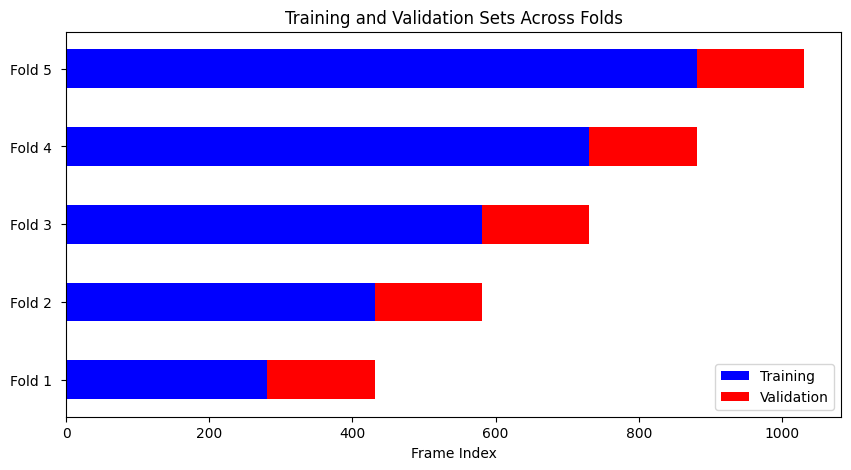

In [128]:
total_length = 1031  # Total length of your data

fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the figure size as needed

# Plotting the indices
for i, (train_indices, val_indices) in enumerate(zip(X_trains, X_vals)):
    # Train indices bar
    ax.barh(i , max(train_indices.index) - min(train_indices.index) + 1, left=min(train_indices.index), height=0.5, color='blue', label='Training' if i == 0 else "")
    # Validation indices bar
    ax.barh(i  , max(val_indices.index) - min(val_indices.index) + 1, left=min(val_indices.index), height=0.5, color='red', label='Validation' if i == 0 else "")

ax.set_yticks(np.arange(len(X_trains)) )
ax.set_yticklabels([f'Fold {i+1} ' for i in range(len(X_trains))])
ax.set_xlabel('Frame Index')
ax.set_title('Training and Validation Sets Across Folds')
ax.legend()

plt.show()

In [2]:
for i in range(3):
    if(i==2):
     print(i)

2
